# Finite-Dimensional Analogy

This notebook illustrates the **reduced formulation** idea on a tiny linear-quadratic problem.

We consider a constraint $A y = B u$ (invertible $A$) and a quadratic objective
$$
J(y,u) = \tfrac12\|y - y_d\|^2 + \tfrac\alpha2\|u\|^2.
$$

Eliminating $y$ gives $y = S u$ with $S = A^{-1}B$, hence the reduced cost $f(u)=J(Su,u)$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ROOT = Path.cwd().parents[1]
OUT_DIR = ROOT / "jupyterbook" / "slides" / "assets" / "lecture01"
OUT_DIR.mkdir(parents=True, exist_ok=True)

np.random.seed(0)

## Build a Tiny Problem

We'll work with small matrices and verify that the reduced cost is convex and has a unique minimizer.

In [7]:
n, m = 6, 3
A = np.random.randn(n, n)
A = A.T @ A + 0.5 * np.eye(n)  # SPD => invertible
B = np.random.randn(n, m)
alpha = 1e-2
y_d = np.random.randn(n)

S = np.linalg.solve(A, B)

def J(y, u):
    return 0.5 * np.dot(y - y_d, y - y_d) + 0.5 * alpha * np.dot(u, u)

def f(u):
    y = S @ u
    return J(y, u)

## Closed-Form Minimizer

For this quadratic reduced problem, the minimizer solves
$$
(S^T S + \alpha I)u = S^T y_d.
$$

In [8]:
H = S.T @ S + alpha * np.eye(m)
rhs = S.T @ y_d
u_star = np.linalg.solve(H, rhs)
y_star = S @ u_star

f_star = f(u_star)
f_star

0.24237750985949655

## A 1D Slice Plot

Plot $f(u_* + t d)$ along a random direction $d$.

PosixPath('/Users/heltai/latex/courses/2025/02_nmopt/jupyterbook/slides/assets/lecture01/reduced_cost_slice.png')

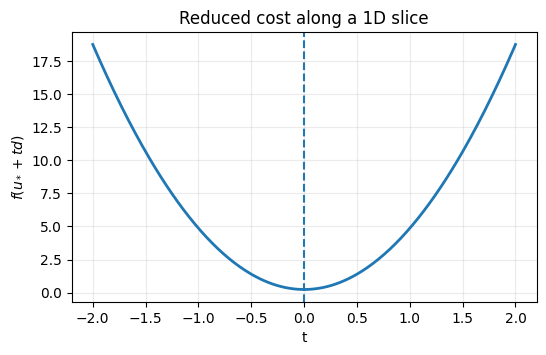

In [9]:
d = np.random.randn(m)
d /= np.linalg.norm(d)
t = np.linspace(-2.0, 2.0, 300)
vals = np.array([f(u_star + ti * d) for ti in t])

fig, ax = plt.subplots(figsize=(6.0, 3.5))
ax.plot(t, vals, linewidth=2)
ax.axvline(0.0, linestyle="--", linewidth=1.5)
ax.set_title("Reduced cost along a 1D slice")
ax.set_xlabel("t")
ax.set_ylabel(r"$f(u_* + t d)$")
ax.grid(True, alpha=0.25)
fig.savefig(OUT_DIR / "reduced_cost_slice.png", dpi=200, bbox_inches="tight")
# plt.close(fig)

OUT_DIR / "reduced_cost_slice.png"

## Constrained Minimization Example (2D)

We consider the finite-dimensional constrained problem:

$$
\min_{u\in\mathbb{R}^2} f(u)=\frac12 u^T A u
\quad\text{s.t.}\quad
\varphi(u)=Bu-g=0,
$$

with $A$ symmetric positive definite, $B\in\mathbb{R}^{1\times 2}$, $g\in\mathbb{R}$.

KKT conditions for the Lagrangian
$$
\mathcal{L}(u,\lambda)=f(u)-\lambda(Bu-g)
$$
are
$$
Au-B^T\lambda=0,\qquad Bu-g=0,
$$
which gives the linear saddle-point system
$$
\begin{pmatrix}
A & -B^T\\
-B & 0
\end{pmatrix}
\begin{pmatrix}
u\\\lambda\end{pmatrix}
=
\begin{pmatrix}0\\-g\end{pmatrix}.
$$


In [ ]:
# 2D constrained minimization: geometry + 1D feasible restriction
A2 = np.array([[3.0, 1.0], [1.0, 2.0]], dtype=float)
B2 = np.array([[1.0, -1.0]], dtype=float)
g2 = np.array([0.5], dtype=float)

kkt = np.block([[A2, -B2.T], [-B2, np.zeros((1, 1))]])
rhs = np.concatenate([np.zeros(2), -g2])
sol = np.linalg.solve(kkt, rhs)
u2_star = sol[:2]
lambda2_star = sol[2]

print('u* =', u2_star)
print('lambda* =', lambda2_star)

# Contours of f(u) and constraint line Bu=g
u1 = np.linspace(-1.2, 1.8, 400)
u2 = np.linspace(-1.2, 1.8, 400)
U1, U2 = np.meshgrid(u1, u2)
F2 = 0.5 * (A2[0, 0] * U1**2 + 2.0 * A2[0, 1] * U1 * U2 + A2[1, 1] * U2**2)

fig, ax = plt.subplots(figsize=(6.2, 4.6))
levels = np.linspace(0.1, 4.0, 9)
ax.contour(U1, U2, F2, levels=levels, cmap='Greens', linewidths=1.5)

line_u1 = np.array([u1.min(), u1.max()])
line_u2 = line_u1 - g2[0]  # u2 = u1 - g
ax.plot(line_u1, line_u2, color='purple', linewidth=2.2, label=r'$\varphi(u)=Bu-g=0$')

ax.scatter(u2_star[0], u2_star[1], color='navy', s=50, zorder=5)
ax.text(u2_star[0] + 0.05, u2_star[1] + 0.03, r'$u^\star$', color='navy')

grad_f = A2 @ u2_star
grad_phi = B2.ravel()
scale = 0.28
ax.arrow(u2_star[0], u2_star[1], scale * grad_f[0], scale * grad_f[1],
         width=0.004, head_width=0.05, color='tab:red', length_includes_head=True)
ax.text(u2_star[0] + scale * grad_f[0] + 0.03,
        u2_star[1] + scale * grad_f[1] + 0.02,
        r'$\nabla f(u^\star)$', color='tab:red')

ax.arrow(u2_star[0], u2_star[1], scale * grad_phi[0], scale * grad_phi[1],
         width=0.004, head_width=0.05, color='tab:blue', length_includes_head=True)
ax.text(u2_star[0] + scale * grad_phi[0] + 0.03,
        u2_star[1] + scale * grad_phi[1] + 0.02,
        r'$\nabla \varphi$', color='tab:blue')

ax.set_title('2D constrained minimization: geometry')
ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(u1.min(), u1.max())
ax.set_ylim(u2.min(), u2.max())
ax.grid(True, alpha=0.25)
ax.legend(loc='upper left')
fig.savefig(OUT_DIR / 'minimization_geometry.png', dpi=200, bbox_inches='tight')

# Restrict to the feasible line u(t)=u0+t d where B d = 0
u0 = np.array([g2[0], 0.0])
d = np.array([1.0, 1.0])
t = np.linspace(-1.5, 1.5, 300)
Uline = u0[None, :] + t[:, None] * d[None, :]
vals_line = 0.5 * np.einsum('bi,ij,bj->b', Uline, A2, Uline)

t_star = t[np.argmin(vals_line)]

fig, ax = plt.subplots(figsize=(6.0, 3.6))
ax.plot(t, vals_line, linewidth=2.0)
ax.axvline(t_star, linestyle='--', linewidth=1.5)
ax.set_title(r'$f(u(t))$ on the constraint $\varphi(u)=0$')
ax.set_xlabel(r'$t$ (feasible direction parameter)')
ax.set_ylabel(r'$f(u(t))$')
ax.grid(True, alpha=0.25)
ax.text(t_star + 0.04, float(np.min(vals_line)) + 0.03, rf'$t^\star \approx {t_star:.3f}$', fontsize=10)
fig.savefig(OUT_DIR / 'minimization_on_constraint.png', dpi=200, bbox_inches='tight')

OUT_DIR / 'minimization_geometry.png', OUT_DIR / 'minimization_on_constraint.png'

## What Changes for PDEs

- $S$ becomes the solution operator of a PDE (still linear in LQ elliptic problems).
- Gradients are computed efficiently via adjoints (no explicit $S$ matrix).